# Recursive DFA-algorithm

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from transduction import (
    FSA, FST, EPSILON, PrecoverDecomp, examples, Precover,    
    display_table, format_table, HTML, colors, LazyPrecoverNFA
)

In [4]:
from transduction.dfa_decomp import RecursiveDFADecomposition

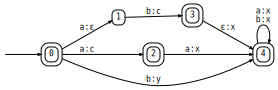

In [17]:
#f = examples.replace([('1', 'a'), ('2', 'b'), ('3', 'c'), ('4', 'd'), ('5', 'e')])
#target = 'abc'
f = examples.samuel_example()
target = 'cxx'

#f = examples.parity({'a','b'})
#target = '0'
#f = examples.newspeak2()
#target = 'bad'
f

In [18]:
start = RecursiveDFADecomposition(f, target[:0])
start.check()
start

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(0, '')} <!-- start->0 --> start->0",∅


In [19]:
a = (start >> target[0])
a.check()
a

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(0, '')} <!-- start->0 --> start->0 <!-- 1 --> 1 {(1, ''),(2, 'c')} <!-- 0->1 --> 0->1 a",∅


In [20]:
ab = (a >> target[1])
ab.check()
ab

In [21]:
abc = (ab >> target[2])
abc.check()
abc

In [22]:
#for x in abc.Q.language(10):
#    print(x)

### Parity

In [23]:
f = examples.parity({'a'})
s = RecursiveDFADecomposition(f, '')
s.check()
s

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0",∅


In [24]:
s0 = s >> '0'
s0.check()
s0

quotient,remainder
∅,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0 <!-- 1 --> 1 {(1, ''),(2, '0')} <!-- 0->1 --> 0->1 a <!-- 2 --> 2 {(0, '')} <!-- 1->2 --> 1->2 a <!-- 2->1 --> 2->1 a"


In [25]:
s1 = s >> '1'
s1.check()
s1

quotient,remainder
∅,"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 {(2, '1'),(0, '')} <!-- start->0 --> start->0 <!-- 1 --> 1 {(1, '')} <!-- 0->1 --> 0->1 a <!-- 1->0 --> 1->0 a"


In [26]:
#for xs, ys in f.relation(5):
#    print((xs, ys))

### Other Test Cases

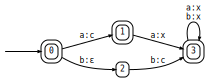

In [92]:
fst = FST()

fst.add_I(0)
fst.add_F(0)

# Direct C, like your original
fst.add_arc(0, 'a', 'c', 1)
fst.add_F(1)
fst.add_arc(1, 'a', 'x', 3)

# Indirect C via epsilon-output
fst.add_arc(0, 'b', EPSILON, 2)
fst.add_arc(2, 'b', 'c', 3)

fst.add_F(3)
fst.add_arc(3, 'a', 'x', 3)
fst.add_arc(3, 'b', 'x', 3)

fst

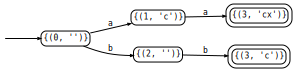

In [93]:
s = RecursiveDFADecomposition(fst, '')
s.check()
display(s.Q.trim())
display(s.R.trim())

In [94]:
Precover(fst, '').show_decomposition(minimize=False)

In [95]:
Precover(fst, 'c').show_decomposition(minimize=False)

In [96]:
#for x,y in fst.relation(10):
#    print([x,y])

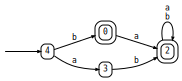

In [97]:
(FSA.universal(fst.A - {''}) - (fst @ FSA.universal(fst.B - {''})).project(0)).min()

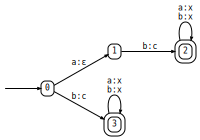

In [98]:
fst = FST()

fst.add_I(0)

# Path 1: 0 -b|c-> 3
fst.add_arc(0, 'b', 'c', 3)

# Path 2: 0 -a|ε-> 1; 1 -b|c-> 2
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(1, 'b', 'c', 2)

# After we have emitted 'c', we only emit 'x' forever.
for q in (2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

In [101]:
Precover(fst, 'c').show_decomposition()

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 2 <!-- start->0 --> start->0 <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 b <!-- 2 --> 2 3 <!-- 0->2 --> 0->2 a <!-- 2->1 --> 2->1 b",∅


In [102]:
Precover(fst, 'x').show_decomposition()

quotient,remainder
∅,∅


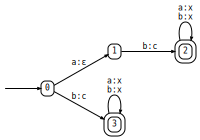

In [38]:
fst = FST()

fst.add_I(0)

# Path 1: 0 -b|c-> 3
fst.add_arc(0, 'b', 'c', 3)

# Path 2: 0 -a|ε-> 1; 1 -b|c-> 2
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(1, 'b', 'c', 2)

# After we have emitted 'c', we only emit 'x' forever.
for q in (2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

In [40]:
Precover(fst, 'c').show_decomposition(minimize=False)

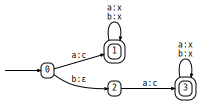

In [41]:
fst = FST()

fst.add_I(0)

# Path A: 'a' -> 'c'
fst.add_arc(0, 'a', 'c', 1)

# Path B: 'b' (ε) then 'a' -> 'c'
fst.add_arc(0, 'b', EPSILON, 2)
fst.add_arc(2, 'a', 'c', 3)

# After 'c', just loop with 'x'
for q in (1, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

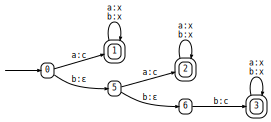

In [42]:

fst = FST()

fst.add_I(0)

# Path 1: 'a' -> 'c'
fst.add_arc(0, 'a', 'c', 1)

# Path 2: 'b' (ε) then 'a' -> 'c'  i.e., "ba"
fst.add_arc(0, 'b', EPSILON, 5)
fst.add_arc(5, 'a', 'c', 2)

# Path 3: 'b' (ε), then 'b' (ε), then 'b' -> 'c'  i.e., "bbb"
fst.add_arc(5, 'b', EPSILON, 6)
fst.add_arc(6, 'b', 'c', 3)

# After 'c', loop 'x' on both symbols
for q in (1, 2, 3):
    fst.add_F(q)
    fst.add_arc(q, 'a', 'x', q)
    fst.add_arc(q, 'b', 'x', q)

fst

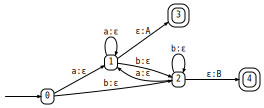

In [43]:
fst = FST()

fst.add_I(0)

# Transition: track last symbol, no output yet.
fst.add_arc(0, 'a', EPSILON, 1)
fst.add_arc(0, 'b', EPSILON, 2)

fst.add_arc(1, 'a', EPSILON, 1)
fst.add_arc(1, 'b', EPSILON, 2)

fst.add_arc(2, 'a', EPSILON, 1)
fst.add_arc(2, 'b', EPSILON, 2)

# Final ε-output arcs
fst.add_arc(1, EPSILON, 'A', 3)   # last was a
fst.add_arc(2, EPSILON, 'B', 4)   # last was b

fst.add_F(3)
fst.add_F(4)

fst

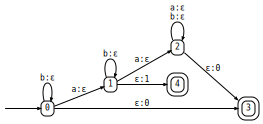

In [44]:
fst = FST()

fst.add_I(0)

# From state 0
fst.add_arc(0, 'a', EPSILON, 1)  # first a
fst.add_arc(0, 'b', EPSILON, 0)  # still zero a's

# From state 1
fst.add_arc(1, 'a', EPSILON, 2)  # second a
fst.add_arc(1, 'b', EPSILON, 1)  # still exactly one a

# From state 2
fst.add_arc(2, 'a', EPSILON, 2)
fst.add_arc(2, 'b', EPSILON, 2)

# Final ε-output arcs
fst.add_arc(0, EPSILON, '0', 3)  # zero a's
fst.add_arc(1, EPSILON, '1', 4)  # exactly one a
fst.add_arc(2, EPSILON, '0', 3)  # at least two a's

fst.add_F(3)
fst.add_F(4)

fst

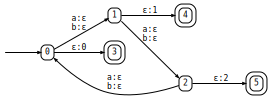

In [45]:
fst = FST()

fst.add_I(0)

# Cycle mod 3 on any input symbol, no output
for s_from, s_to in [(0, 1), (1, 2), (2, 0)]:
    fst.add_arc(s_from, 'a', EPSILON, s_to)
    fst.add_arc(s_from, 'b', EPSILON, s_to)

# Final ε-output arcs
fst.add_arc(0, EPSILON, '0', 3)
fst.add_arc(1, EPSILON, '1', 4)
fst.add_arc(2, EPSILON, '2', 5)

fst.add_F(3)
fst.add_F(4)
fst.add_F(5)

fst

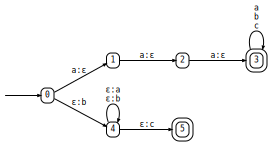

In [46]:
fst = FST()

fst.add_I(0)

fst.add_arc(0, 'a', '', 1) 
fst.add_arc(1, 'a', '', 2)
fst.add_arc(2, 'a', '', 3) 

fst.add_arc(3, 'a', 'a', 3)
fst.add_arc(3, 'b', 'b', 3)
fst.add_arc(3, 'c', 'c', 3)

fst.add_arc(0, '', 'b', 4) 

fst.add_arc(4, '', 'a', 4) 
fst.add_arc(4, '', 'b', 4) 
fst.add_arc(4, '', 'c', 5) 
fst.add_F(5)

fst.add_F(3)

fst

In [47]:
Precover(fst, 'bbbc').show_decomposition()

In [48]:
Precover(fst, '').show_decomposition()

### INFINITE QUOTIENT

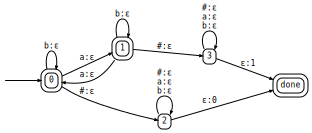

In [79]:
fst = FST()

fst.add_I(0)

# From start (state 0)
fst.add_arc(0, 'a', EPSILON, 1)   # odd a-count
fst.add_arc(0, 'b', EPSILON, 0)   # still even

# Parity-tracking region (no '#' allowed anymore)
fst.add_arc(1, 'a', EPSILON, 0)
fst.add_arc(1, 'b', EPSILON, 1)

# Exit parity region
fst.add_arc(0, '#', EPSILON, 2)
fst.add_arc(1, '#', EPSILON, 3)

# Absorbing region: 
fst.add_arc(2, 'a', EPSILON, 2)
fst.add_arc(2, 'b', EPSILON, 2)
fst.add_arc(2, '#', EPSILON, 2)

# Absorbing region:
fst.add_arc(3, 'a', EPSILON, 3)
fst.add_arc(3, 'b', EPSILON, 3)
fst.add_arc(3, '#', EPSILON, 3)

# even → '0', odd → '1', absorbing → '0'
#fst.add_arc(0, '', '0', 'done')
fst.add_F('done')
fst.add_arc(3, '', '1', 'done')
fst.add_arc(2, '', '0', 'done')

fst.add_F(0)
fst.add_F(1)

fst

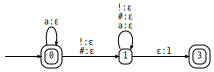

In [80]:
fst = examples.infinite_quotient(separators=('#','!'))
fst

In [81]:
Precover(fst, '').show_decomposition()

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 0 <!-- start->0 --> start->0",∅


In [82]:
Precover(fst, '0').show_decomposition()

quotient,remainder
∅,∅


In [83]:
Precover(fst, '1').show_decomposition()

quotient,remainder
"<?xml version=""1.0"" encoding=""UTF-8"" standalone=""no""?> <!DOCTYPE svg PUBLIC ""-//W3C//DTD SVG 1.1//EN"" ""http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd""> <!-- Generated by graphviz version 2.43.0 (0) --> <!-- Title: %3 Pages: 1 --> %3 <!-- start --> start <!-- 0 --> 0 2 <!-- start->0 --> start->0 <!-- 0->0 --> 0->0 a <!-- 1 --> 1 0 <!-- 0->1 --> 0->1 ! #",∅


In [84]:
#display_table(list(fst.relation(5)), headings=['x', 'y'])

In [85]:
#list(fst.relation(10))

Double check that this example is a function.

In [86]:
from arsenal.iterextras import groupby2
for x, ys in groupby2(fst.relation(10), lambda xy: xy[0]).items():
    assert len(ys) == 1, [x, ys]

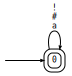

In [87]:
(fst @ FSA.universal(fst.B - {''})).project(0).min()

In [88]:
P = Precover(fst, '')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)

In [89]:
P = Precover(fst, '0')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)

In [90]:
P = Precover(fst, '1')
U = FSA.universal(fst.A - {''})
Q, R = P.decomposition
assert (Q * U & R).equal(FSA.zero)
assert (Q * U | R).equal(P.min)